<a href="https://colab.research.google.com/github/JamshedAli18/Scikit-learn-Algorithms-practice/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'medium risk': 1, 'high risk': 2})

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df[['RiskLevel']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head()
df.shape

(1014, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['RiskLevel'], axis = 1), df['RiskLevel'], test_size = 0.2)


In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.8423645320197044

In [ ]:
matrix = confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns

<Axes: >

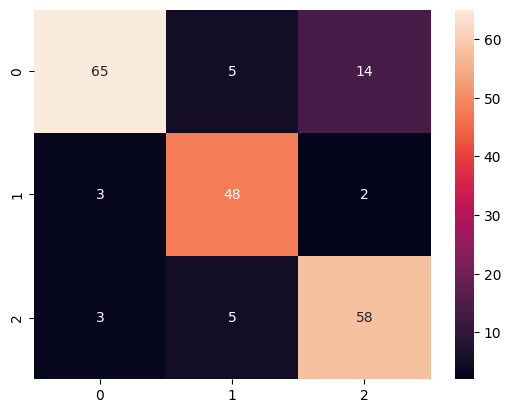

In [ ]:
sns.heatmap(matrix,annot=True)

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='SystolicBP', color='RiskLevel',
                 title='Scatter Plot of Age vs SystolicBP by Risk Level')

# Step 3: Show the plot
fig.show()

In [ ]:
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']
df['PredictedRiskLevel'] = model.predict(X)

In [ ]:
fig = px.scatter(df, x='Age', y='SystolicBP', color='PredictedRiskLevel',
                 symbol='RiskLevel',
                 title='Classification of Risk Levels',
                 labels={'PredictedRiskLevel': 'Predicted Risk Level'},
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Step 7: Show the plot
fig.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

# 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='SystolicBP', z='HeartRate', color='RiskLevel',
                    title='3D Scatter Plot of Age, SystolicBP, and HeartRate',
                     color_discrete_sequence=px.colors.qualitative.Dark2
)
fig.show()